# EDA YOUTUBE DAILY TRENDING DATASETS UNITED STATES

## IMPORT LIBRARY YANG DIPERLUKAN

In [1]:
# import library
import pandas as pd
import json as js
from pandas.io.json import json_normalize

# import matplotlib
import matplotlib.pyplot as plt

# import numpy
import numpy as np

# import seaborn
import seaborn as sns
%matplotlib inline

# import stats
from scipy import stats

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
# import bokeh
from bokeh.plotting import figure, show, output_notebook, reset_output
from bokeh.models import ColumnDataSource, BasicTickFormatter
from bokeh.models.tools import HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Reds8, Greens8, Blues8, Oranges8

In [3]:
# load datasets US
dfUSvideos = pd.read_csv("datasets/USvideos.csv")
dfUScategory = pd.read_csv("datasets/USCategories.csv")

# set option agar float dapat ditampilkan seluruhnya
pd.set_option('float_format', '{:f}'.format)

## IDENTIFIKASI ATRIBUT DATA VIDEO UNITED STATES
Berikut adalah atribut data video dari region United States :

In [4]:
dfUSvideos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

#### Karena kolom trending_date pada semua data video adalah string dengan format year.month.day (contoh : 17.11.14), maka objek dari kolom tersebut perlu diubah menjadi bentuk datetime

In [5]:
dfUSvideos['trending_date'] =  pd.to_datetime(dfUSvideos['trending_date'], format='%y.%d.%m')

In [6]:
dfUSvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [7]:
dfUSvideos.shape

(40949, 16)

Berdasarkan pengecekan data video dari region United States memiliki dimensi <b>40881 baris x 16 kolom</b>.

## DATA KATEGORI VIDEO REGION UNITED STATES
Berikut adalah data kategori video region United States setelah diubah menjadi dataframe :

In [8]:
dfUScategory

,id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,19,Travel & Events
6,20,Gaming
7,22,People & Blogs
8,23,Comedy
9,24,Entertainment


In [9]:
dfUScategory.shape

(16, 2)

Berdasarkan pengecekan data kategori region United States memiliki dimensi <b>31 baris x 2 kolom</b>.

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## A. STATISTIK DARI SETIAP KATEGORI YANG TERDAPAT DI DATAFRAME VIDEOS UNITED STATES
Kita perlu mengetahui statistik berikut untuk setiap kategori :
#### 1. Data tertinggi, terendah, dan rata-rata viewer
#### 2. Data tertinggi, terendah, dan rata-rata likes
#### 3. Data tertinggi, terendah, dan rata-rata dislikes
#### 5. Data tertinggi, terendah, dan rata-rata jumlah komentar

Di sini kita akan menemukan statistik data video dari region United States menggunakan list <b>gUSvideo</b> yang mana adalah list di mana video kelompokkan berdasarkan id kategori.<br/>

Untuk menemukan rata-rata digunakan fungsi <b>.max()</b> pada data grup id kategori yang diinginkan. Untuk menemukan value tertinggi digunakan <b>.max()</b> dan untuk menemukan value terkecil digunakan <b>.min()</b>

In [10]:
# mengelompokan berdasarkan id kategori
gUSvideo = dfUSvideos.groupby('category_id')

# memasukkan id kategori ke dalam bentuk array untuk digunakan dalam eksplorasi
a = dfUSvideos.category_id.unique()
a.sort(axis=0)
a

array([ 1,  2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43],
      dtype=int64)

### 1A. Data tertinggi, terendah, dan rata-rata viewer United States

In [11]:
# memasukkan data ke dalam list
data_view_us = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region United States
    'id' : a,
    #penonton tertinggi
    'highest_views':[gUSvideo.get_group(items)['views'].max() for items in dfUScategory['id']],
    
    #penonton terendah
    'lowest_views':[gUSvideo.get_group(items)['views'].min() for items in dfUScategory['id']],
    
    #penonton rata-rata
    'average_views':[gUSvideo.get_group(items)['views'].mean() for items in dfUScategory['id']],

    #median data
    'median_views':[gUSvideo.get_group(items)['views'].median() for items in dfUScategory['id']
                   ]}

dfViewUS = pd.DataFrame(data_view_us)

In [12]:
dfViewUS = pd.merge(dfUScategory,dfViewUS,on="id")

print("")
print("DATA VIEWER SETIAP KATEGORI DI REGION UNITED STATES")
dfViewUS


DATA VIEWER SETIAP KATEGORI DI REGION UNITED STATES


,id,category,highest_views,lowest_views,average_views,median_views
0,1,Film & Animation,54863912,943,3106250.200853,1274578.000000
1,2,Autos & Vehicles,25244097,2860,1355965.408854,406278.000000
2,10,Music,225211923,1591,6201003.119592,1434128.000000
3,15,Pets & Animals,6187457,3393,831143.466304,444501.500000
4,17,Sports,29090799,658,2025969.030819,559352.000000
5,19,Travel & Events,23932421,789,854619.611940,494825.500000
6,20,Gaming,16935442,1237,2620830.630355,1494142.000000
7,22,People & Blogs,56111957,884,1531835.428660,599139.000000
8,23,Comedy,29178096,1807,1480308.420017,980236.000000
9,24,Entertainment,149376127,798,2067883.199016,734704.000000


### 2A. Data tertinggi, terendah, dan rata-rata likes United States

In [13]:
# memasukkan data ke dalam list
data_likes_us = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region United States
    'id' : a,
    'highest_likes':[gUSvideo.get_group(items)['likes'].max() for items in dfUScategory['id']],
    'lowest_likes':[gUSvideo.get_group(items)['likes'].min() for items in dfUScategory['id']],
    'average_likes':[gUSvideo.get_group(items)['likes'].mean() for items in dfUScategory['id']],
    'median_likes':[gUSvideo.get_group(items)['likes'].median() for items in dfUScategory['id']
                   ]}

dfLikesUS = pd.DataFrame(data_likes_us)

In [14]:
dfLikesUS = pd.merge(dfUScategory,dfLikesUS,on="id")

print("")
print("DATA LIKES SETIAP KATEGORI DI REGION UNITED STATES")
dfLikesUS


DATA LIKES SETIAP KATEGORI DI REGION UNITED STATES


,id,category,highest_likes,lowest_likes,average_likes,median_likes
0,1,Film & Animation,922355,0,70787.836247,25176.000000
1,2,Autos & Vehicles,97030,0,11056.395833,5916.000000
2,10,Music,5613827,0,218918.199011,62280.500000
3,15,Pets & Animals,178243,6,21055.110870,14431.500000
4,17,Sports,1121217,0,45363.942502,5700.500000
5,19,Travel & Events,42447,3,12030.462687,11634.000000
6,20,Gaming,444203,2,84502.183599,51057.000000
7,22,People & Blogs,2032463,0,58135.825234,19438.000000
8,23,Comedy,865679,6,62582.223315,30214.000000
9,24,Entertainment,3093544,0,53243.325070,16234.000000


### 3B. Data tertinggi, terendah, dan rata-rata dislikes United States

In [15]:
# memasukkan data ke dalam list
data_dislikes_us = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region United States
    'id' : a,
    'highest_dislikes':[gUSvideo.get_group(items)['dislikes'].max() for items in dfUScategory['id']],
    'lowest_dislikes':[gUSvideo.get_group(items)['dislikes'].min() for items in dfUScategory['id']],
    'average_dislikes':[gUSvideo.get_group(items)['dislikes'].mean() for items in dfUScategory['id']],
    'median_dislikes':[gUSvideo.get_group(items)['dislikes'].median() for items in dfUScategory['id']
                   ]}

dfDislikesUS = pd.DataFrame(data_dislikes_us)

In [16]:
dfDislikesUS = pd.merge(dfUScategory,dfDislikesUS,on="id")

print("")
print("DATA DISLIKES SETIAP KATEGORI DI REGION UNITED STATES")
dfDislikesUS


DATA DISLIKES SETIAP KATEGORI DI REGION UNITED STATES


,id,category,highest_dislikes,lowest_dislikes,average_dislikes,median_dislikes
0,1,Film & Animation,38082,0,2590.681450,1022.000000
1,2,Autos & Vehicles,12290,0,632.838542,279.000000
2,10,Music,343541,0,7907.757726,1243.500000
3,15,Pets & Animals,4899,0,573.238043,276.000000
4,17,Sports,176903,0,2361.339006,343.000000
5,19,Travel & Events,9000,0,846.833333,351.000000
6,20,Gaming,212976,0,11241.696450,1956.000000
7,22,People & Blogs,228426,0,3173.800935,555.500000
8,23,Comedy,29865,0,2091.521840,956.000000
9,24,Entertainment,1674420,0,4314.297772,627.000000


### 4B. Data tertinggi, terendah, dan rata-rata jumlah komentar United States

In [17]:
# memasukkan data ke dalam list
data_comments_us = {
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region United States
    'id' : a,
    'highest_comments':[gUSvideo.get_group(items)['comment_count'].max() for items in dfUScategory['id']],
    'lowest_comments':[gUSvideo.get_group(items)['comment_count'].min() for items in dfUScategory['id']],
    'average_comments':[gUSvideo.get_group(items)['comment_count'].mean() for items in dfUScategory['id']],
    'median_comments':[gUSvideo.get_group(items)['comment_count'].median() for items in dfUScategory['id']
                   ]}

dfCommentsUS = pd.DataFrame(data_comments_us)

In [18]:
dfCommentsUS = pd.merge(dfUScategory,dfCommentsUS,on="id")

print("")
print("DATA COMMENTS SETIAP KATEGORI DI REGION UNITED STATES")
dfCommentsUS


DATA COMMENTS SETIAP KATEGORI DI REGION UNITED STATES


,id,category,highest_comments,lowest_comments,average_comments,median_comments
0,1,Film & Animation,108849,0,7627.744136,2636.000000
1,2,Autos & Vehicles,10591,0,2042.830729,916.000000
2,10,Music,1228655,0,19359.764524,3906.000000
3,15,Pets & Animals,44063,0,2892.070652,1173.000000
4,17,Sports,83660,0,5148.185373,1127.500000
5,19,Travel & Events,13631,0,2267.440299,1674.500000
6,20,Gaming,144795,0,18042.488372,8871.000000
7,22,People & Blogs,383762,0,7719.013084,1678.000000
8,23,Comedy,81051,0,6521.718831,2604.000000
9,24,Entertainment,1361580,0,7383.229426,1693.500000


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## B. BOXPLOTTING ABSOLUTE VALUE BERDASARKAN KATEGORI DATA VIDEO UNITED STATES

Berikut adalah data jumlah viewer region United States apabila divisualisasikan dengan boxplot. Karena data terlalu beragam, outliernya terlalu tinggi dan tidak dapat dilihat dengan baik.

### 1B. Boxplotting Absolute Value Viewer Berdasarkan Kategori Data Video United States

In [19]:
# list jumlah views wilayah United States berdasarkan array a
data_view_us_boxplot = [gUSvideo.get_group(items)['views'].values for items in a]

Text(0, 0.5, 'Jumlah Viewer')

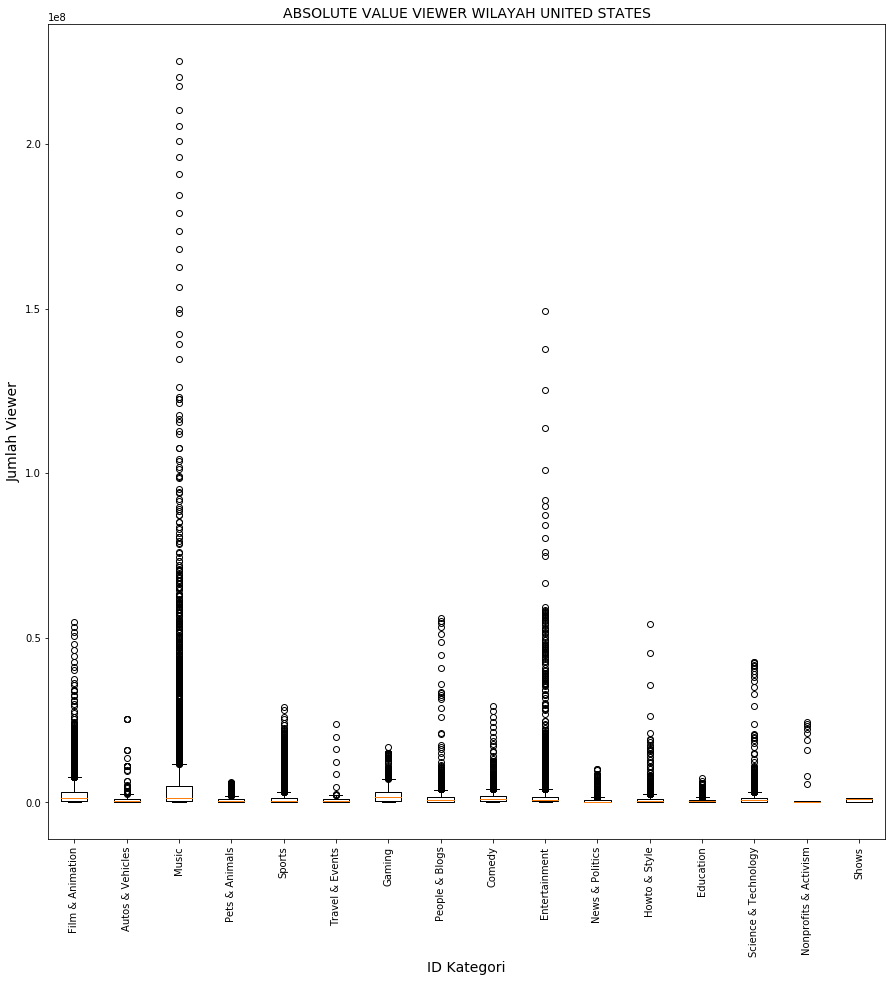

In [20]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(data_view_us_boxplot)

# penamaan x tick berdasarkan id kategori United States
ax.set_xticklabels(dfUScategory['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE VIEWER WILAYAH UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("ID Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

Karena setelah dilakukan boxplotting outlier terlihat terlalu banyak maka diputuskan untuk dicoba dilakukan outlier removal dengan metode z-score dan IQR pada salah satu kategori yaitu Entertainment yang mana ada di urutan 9 pada array a.

#### Testing Z-Score Viewer Salah Satu Kategori Video United States Yaitu Entertainment

In [21]:
data_view_us_test = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region United States
    'id' : a,
    #penonton tertinggi
    'viewer':[gUSvideo.get_group(items)['views'].values for items in dfUScategory['id']]
}

dfViewUStest = pd.DataFrame(data_view_us_test)
dfViewUStest

,id,viewer
0,1,"[826059, 50867, 288922, 52591, 1751064, 273673..."
1,2,"[98378, 7265, 4850, 704363, 341074, 93829, 551..."
2,10,"[687582, 17158531, 13917, 57169, 60506, 328330..."
3,15,"[207532, 45455, 284666, 426078, 46571, 279092,..."
4,17,"[81377, 945, 956169, 4569, 1044813, 162597, 18..."
5,19,"[141148, 311621, 571588, 1037561, 403564, 1118..."
6,20,"[154872, 161231, 224426, 463992, 55460, 686170..."
7,22,"[748374, 98966, 321053, 197062, 2744430, 17770..."
8,23,"[3191434, 295639, 33980, 605932, 3358068, 1482..."
9,24,"[2418783, 343168, 2095731, 2103417, 104578, 22..."


In [22]:
data_ent_us_view = {
    'viewer' : dfViewUStest.loc[9, 'viewer'],
    'z-score' : stats.zscore(dfViewUStest.loc[9, 'viewer'])
}

dfEntertainViewTest = pd.DataFrame(data_ent_us_view)

In [23]:
# Membuat Dataframe Baru yang telah difilter tanpa outlier
dfEntertainViewTestz = dfEntertainViewTest[dfEntertainViewTest['z-score'] < 3]

dfEntertainViewTestz

,viewer,z-score
0,2418783,0.060337
1,343168,-0.296562
2,2095731,0.004788
3,2103417,0.006110
4,104578,-0.337587
...,...,...
9959,2003345,-0.011097
9960,1437051,-0.108470
9961,8607264,1.124435
9962,5564576,0.601250


Text(0, 0.5, 'Jumlah Views')

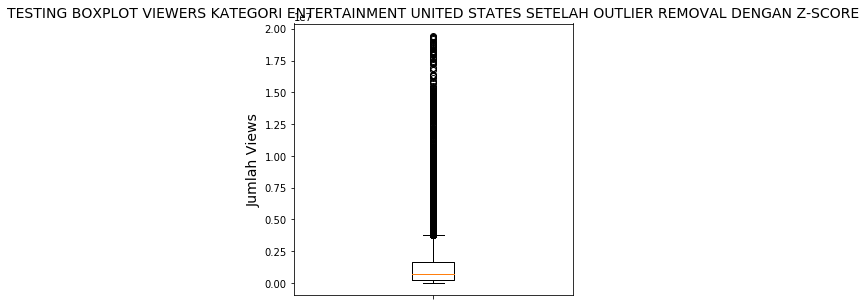

In [24]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfEntertainViewTestz['viewer'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("TESTING BOXPLOT VIEWERS KATEGORI ENTERTAINMENT UNITED STATES SETELAH OUTLIER REMOVAL DENGAN Z-SCORE", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

Setelah dilakukan outlier removal dengan Z-Score masih terlihat bahwa outlier dianggap masih terlalu banyak hingga sulit untuk dibaca, maka diputuskan untuk mencoba dilakukan outlier removal dengan IQR

Step untuk mendeteksi outlier salah satunya adalah dengan menemukan range bawah dan atas dari suatu data dengan cara berikut :
1. Mengurutkan data dari nilai terendah
2. Menghitung Q1 (kuartil 1)
3. Menghitung Q3 (kuartil 3)
4. Menghitung IQR = (Q3 - Q1)
5. Menemukan range bawah data = Q1 -(1.5 * IQR)
6. Menemukan range atas data = Q3 + (1.5 * IQR)

In [25]:
Q1_test_ent_US = dfEntertainViewTest.viewer.quantile(0.25)
Q3_test_ent_US = dfEntertainViewTest.viewer.quantile(0.75)
IQR_test_ent_US = Q3_test_ent_US - Q1_test_ent_US
lower_test_ent_US = Q1_test_ent_US  - (1.5 * IQR_test_ent_US)
upper_test_ent_US =  Q3_test_ent_US + (1.5 * IQR_test_ent_US)

print("IQR Ent United States")
print("IQR =", IQR_test_ent_US)
print("Lower =", lower_test_ent_US)
print("Upper =", upper_test_ent_US)

IQR Ent United States
IQR = 1460351.5
Lower = -1917132.5
Upper = 3924273.5


In [26]:
dfEntertainViewTest_IQRView = dfEntertainViewTest[(dfEntertainViewTest.viewer < upper_test_ent_US) & (dfEntertainViewTest.viewer > lower_test_ent_US)]

Text(0, 0.5, 'Jumlah Views')

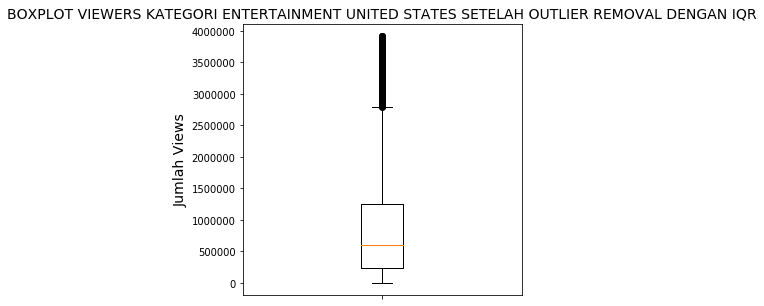

In [27]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfEntertainViewTest_IQRView['viewer'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS KATEGORI ENTERTAINMENT UNITED STATES SETELAH OUTLIER REMOVAL DENGAN IQR", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

Setelah dilakukan outlier removal dengan IQR masih terlihat bahwa outlier masih cukup sulit untuk dibaca, di sini akhirnya diputuskan untuk <b>menampilkan boxplot tanpa outlier</b>.

Text(0, 0.5, 'Jumlah Viewer')

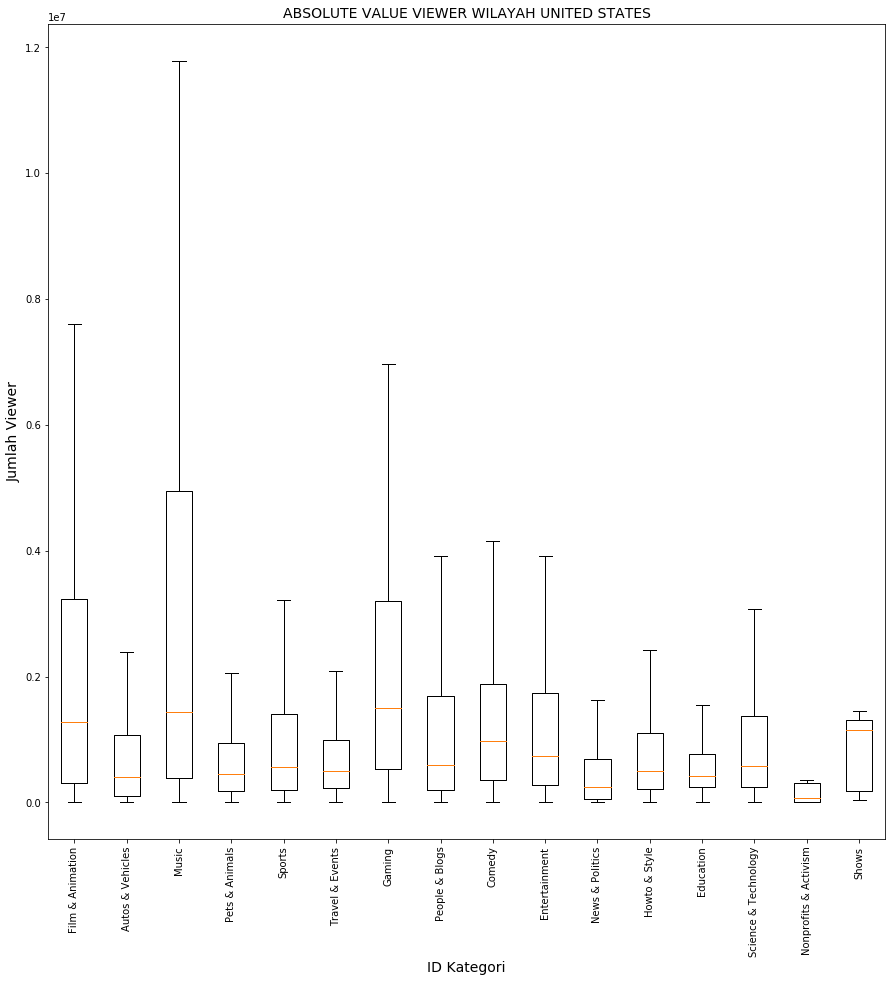

In [28]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(data_view_us_boxplot, showfliers=False)

# penamaan x tick berdasarkan id kategori United States
ax.set_xticklabels(dfUScategory['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE VIEWER WILAYAH UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("ID Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

### 2B. Boxplotting Absolute Value Likes Berdasarkan Kategori Data Video United States

In [29]:
# list jumlah views wilayah United States berdasarkan array a
data_likes_us_boxplot = [gUSvideo.get_group(items)['likes'].values for items in a]

Text(0, 0.5, 'Jumlah Likes')

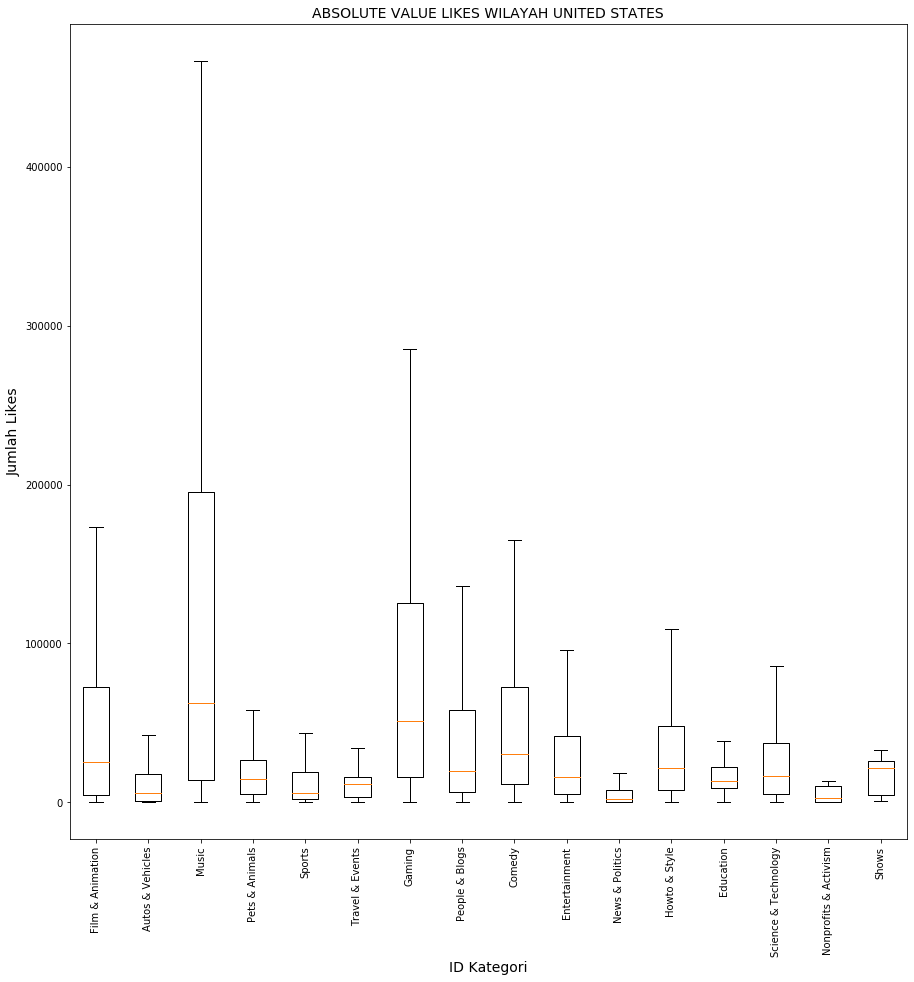

In [30]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(data_likes_us_boxplot, showfliers=False)

# penamaan x tick berdasarkan id kategori United States
ax.set_xticklabels(dfUScategory['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE LIKES WILAYAH UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("ID Kategori", fontsize=14)
plt.ylabel("Jumlah Likes", fontsize=14)

### 3B. Boxplotting Absolute Value Dislikes Berdasarkan Kategori Data Video United States

In [31]:
# list jumlah views wilayah United States berdasarkan array a
data_dislikes_us_boxplot = [gUSvideo.get_group(items)['dislikes'].values for items in a]

Text(0, 0.5, 'Jumlah Dislikes')

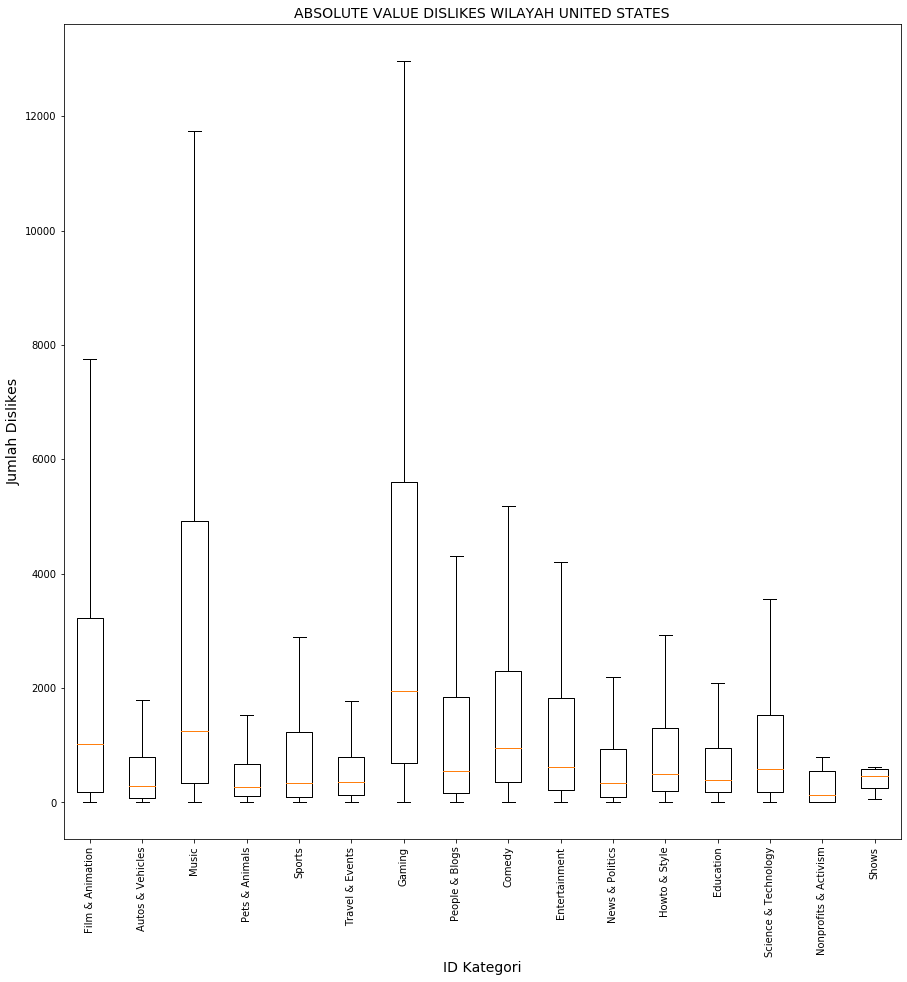

In [32]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(data_dislikes_us_boxplot, showfliers=False)

# penamaan x tick berdasarkan id kategori United States
ax.set_xticklabels(dfUScategory['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE DISLIKES WILAYAH UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("ID Kategori", fontsize=14)
plt.ylabel("Jumlah Dislikes", fontsize=14)

### 4B. Boxplotting Absolute Value Jumlah Komentar Berdasarkan Kategori Data Video United States

In [33]:
# list jumlah views wilayah United States berdasarkan array a
data_comments_us_boxplot = [gUSvideo.get_group(items)['comments'].values for items in a]

KeyError: 'comments'

In [ ]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(data_comments_us_boxplot, showfliers=False)

# penamaan x tick berdasarkan id kategori United States
ax.set_xticklabels(dfUScategory['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE COMMENTS WILAYAH UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("ID Kategori", fontsize=14)
plt.ylabel("Jumlah Komentar", fontsize=14)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## C. BOXPLOTTING RELATIVE VALUE BERDASARKAN KATEGORI DATA VIDEO UNITED STATES
Karena melakukan boxplotting terhadap absolute value untuk jumlah views, likes, dislikes, dan comments tidak dapat dilihat dengan baik karena data terlalu diverse. Maka diputuskan untuk melakukan boxplotting likes, dislikes, dan comments terhadap views untuk setiap video kemudian dikalikan 100 agar range value terjaga mulai dari 0 hingga 100.


<b>Operasinya adalah sebagai sebagai berikut :<br/>
- Jumlah Likes / Jumlah Views * 100<br/>
- Jumlah Dislikes / Jumlah Views * 100<br/>
- Jumlah Comments / Jumlah Views * 100<br/></b>

Untuk itu maka dataframe video perlu dimodifikasi dengan menghapus kolom yang tidak diperlukan dan menambahkan kolom baru dari setiap operasi yang dilakukan

In [ ]:
# drop kolom yang tidak perlu
dfUS = dfUSvideos.drop([
    'trending_date','channel_title','publish_time','tags','thumbnail_link','comments_disabled','ratings_disabled',
  'video_error_or_removed','description'], axis=1)

In [ ]:
# Menambah kolom likes/views
dfUS['likes/views(%)'] = dfUS['likes']/dfUS['views']*100

In [ ]:
# Menambah kolom dislikes/views
dfUS['dislikes/views(%)'] = dfUS['dislikes']/dfUS['views']*100

In [ ]:
# Menambah kolom comments/views
dfUS['comments/views(%)'] = dfUS['comment_count']/dfUS['views']*100

Berikut adalah data video United States setelah dimodifikasi. Dataframe ditambah kolom sebagai berikut :
<b>
- likes/views
- dislikes/views
- comments/views
</b>
semua dalam persen (%)

In [ ]:
dfUS.head()

Karena data video telah dimodifikasi, maka pengelompokan ulang berdasarkan id kategori perlu dilakukan kembali

In [ ]:
gUSvideo = dfUS.groupby('category_id')

In [ ]:
data_relative_views_us = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region United States
    'id' : a,
    'category' : [i for i in dfUScategory['category']],
    'likes/views(%)': [gUSvideo.get_group(items)['likes/views(%)'].values for items in dfUScategory['id']],
    'dislikes/views(%)': [gUSvideo.get_group(items)['dislikes/views(%)'].values for items in dfUScategory['id']],
    'comments/views(%)': [gUSvideo.get_group(items)['comments/views(%)'].values for items in dfUScategory['id']]
}

dfRelativeViewsUS = pd.DataFrame(data_relative_views_us)
dfRelativeViewsUS

### 1C. Boxplotting Relative Value Likes/Views Data Video United States

#### Berikut adalah hasil boxplot jumlah likes terhadap jumlah views di United States

In [ ]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfRelativeViewsUS['likes/views(%)'].values, showfliers=False)

# penamaan x tick
ax.set_xticklabels(dfRelativeViewsUS['category'], rotation='vertical')

# penamaan judul
plt.title("RELATIVE VALUE LIKES/VIEWS WILAYAH UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("KATEGORI", fontsize=14)
plt.ylabel("LIKES/VIEWS", fontsize=14)

### 2C. Boxplotting Relative Value Dislikes/Views Data Video United States

#### Berikut adalah hasil boxplot jumlah dislikes terhadap jumlah views di United States

In [ ]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfRelativeViewsUS['dislikes/views(%)'].values, showfliers=False)

# penamaan x tick
ax.set_xticklabels(dfRelativeViewsUS['category'], rotation='vertical')

# penamaan judul
plt.title("RELATIVE VALUE DISLIKES/VIEWS WILAYAH UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("KATEGORI", fontsize=14)
plt.ylabel("DISLIKES/VIEWS", fontsize=14)

In [ ]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfRelativeViewsUS['comments/views(%)'].values, showfliers=False)

# penamaan x tick
ax.set_xticklabels(dfRelativeViewsUS['category'], rotation='vertical')

# penamaan judul
plt.title("RELATIVE VALUE COMMENTS/VIEWS WILAYAH UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("KATEGORI", fontsize=14)
plt.ylabel("COMMENTS/VIEWS", fontsize=14)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></b>

## MENCARI PENYEBAB FIRST TRENDING DI UNITED STATES

Di sini masing-masing datasets dari setiap region ditransform ulang dengan hanya mencantumkan data video pada saat pertama kali video tersebut mengalami trend

Dataframe baru dibuat dari masing-masing datasets dengan <b>grouping by video_id</b> lalu digunakan <b>loc</b> untuk melokasikan data berdasarkan index, lalu yang dicari adalah trending_date pertama kali, <b>maka dicari index terkecil dari masing-masing video_id berdasarkan trending_datenya dengan menggunakan idxmin()</b>

In [ ]:
dfUSvideosFirstTrend = dfUSvideos.loc[dfUSvideos.groupby('video_id')['trending_date'].idxmin()][['video_id','trending_date','title','channel_title','category_id','publish_time','tags','views','likes','dislikes','comment_count']]

### Sorting

Dilakukan reindex untuk masing-masing dataframe berdasarkan video_id dan trending_date nya

In [ ]:
dfUSvideosFirstTrend = dfUSvideosFirstTrend.sort_values(by=['video_id','trending_date']).reset_index(drop=True)

#### DATA VIDEO FIRST TREND UNITED STATES

Berikut adalah contoh dataframe video United States setelah dimodifikasi dengan hanya menampilkan data-data video saat pertama kali masuk trending

In [ ]:
dfUSvideosFirstTrend.head()

### Boxplotting Viewer Data Video First Trend United States

In [ ]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend['views'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION UNITED STATES", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

## Testing Z-Score Viewer Data Video First Trend United States

In [ ]:
# Membuat Kolom Z-Score Untuk Viewer
dfUSvideosFirstTrend['views_zscore'] = (dfUSvideosFirstTrend.views - dfUSvideosFirstTrend.views.mean())/dfUSvideosFirstTrend.views.std(ddof=0)

# Membuat Dataframe Baru yang telah difilter tanpa outlier
dfUSvideosFirstTrend_zView = dfUSvideosFirstTrend[dfUSvideosFirstTrend.views_zscore < 3]

dfUSvideosFirstTrend_zView

In [ ]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend_zView['views'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION UNITED STATES SETELAH OUTLIER REMOVAL DENGAN Z-SCORE", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

## Testing IQR Viewer Data Video First Trend United States
Step untuk mendeteksi outlier salah satunya adalah dengan menemukan range bawah dan atas dari suatu data dengan cara berikut :
1. Mengurutkan data dari nilai terendah
2. Menghitung Q1 (kuartil 1)
3. Menghitung Q3 (kuartil 3)
4. Menghitung IQR = (Q3 - Q1)
5. Menemukan range bawah data = Q1 -(1.5 * IQR)
6. Menemukan range atas data = Q3 + (1.5 * IQR)

1. Mengurutkan data dari yang terendah

In [ ]:
dfUSvideosFirstTrendSortViews = dfUSvideosFirstTrend.sort_values(by=['views'])

2. Menghitung Q1 (kuartil 1)

In [ ]:
Q1_USFirstTrendView = dfUSvideosFirstTrendSortViews.views.quantile(0.25)

3. Menghitung Q3 (kuartil 3)

In [ ]:
Q3_USFirstTrendView = dfUSvideosFirstTrendSortViews.views.quantile(0.75)

4. Menghitung IQR = (Q3 - Q1)

In [ ]:
IQR_USFirstTrendView = Q3_USFirstTrendView - Q1_USFirstTrendView

5. Menemukan range bawah data = Q1 -(1.5 * IQR)

In [ ]:
lower_USFirstTrendView = Q1_USFirstTrendView - (1.5 * IQR_USFirstTrendView)

6. Menemukan range atas data = Q3 + (1.5 * IQR)

In [ ]:
upper_USFirstTrendView =  Q3_USFirstTrendView + (1.5 * IQR_USFirstTrendView)

<b>Berikut adalah hasil perhitungan yang telah dilakukan di atas</b>

In [ ]:
print("IQR United States")
print("IQR =", IQR_USFirstTrendView)
print("Lower =", lower_USFirstTrendView)
print("Upper =", upper_USFirstTrendView)

In [ ]:
dfUSvideosFirstTrend_IQRView = dfUSvideosFirstTrendSortViews[(dfUSvideosFirstTrendSortViews.views < upper_USFirstTrendView) & (dfUSvideosFirstTrendSortViews.views > lower_USFirstTrendView)]

In [ ]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend_IQRView['views'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION UNITED STATES SETELAH OUTLIER REMOVAL DENGAN IQR", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

Di sini coba dilakukan boxplotting tanpa menampilkan outlier

In [ ]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend_IQRView['views'].values, showfliers=False)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION UNITED STATES SETELAH OUTLIER REMOVAL DENGAN IQR", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

In [ ]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend['views'].values, showfliers=False)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION UNITED STATES TANPA REMOVAL DENGAN IQR", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

## STATISTIK DARI SETIAP KATEGORI YANG TERDAPAT DI DATAFRAME FIRST TREND VIDEO UNITED STATES

In [ ]:
# mengelompokan ulang dataframe videosFirstTrend berdasarkan id kategori
gUSVideoFtrend = dfUSvideosFirstTrend.groupby('category_id')

Membuat dataframe baru yang memiliki kolom id, category yang diambil dari dfUScategory, dan views yang diambil dari hasil pengelompokkan berdasarkan category_id

In [ ]:
data_ftrend_views_us = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region United States
    'id' : a,
    'category' : [i for i in dfUScategory['category']],
    'views': [gUSVideoFtrend.get_group(items)['views'].values for items in dfUScategory['id']]
}

dfFtrendViewsUS = pd.DataFrame(data_ftrend_views_us)
dfFtrendViewsUS

In [ ]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfFtrendViewsUS['views'].values, showfliers = False)

# penamaan x tick
ax.set_xticklabels(dfFtrendViewsUS['category'], rotation='vertical')

# penamaan judul
plt.title("DATA JUMLAH VIEW BERDASARKAN KATEGORI DATA VIDEO FIRST TREND UNITED STATES", fontsize=14)

# penamaan label
plt.xlabel("KATEGORI", fontsize=14)
plt.ylabel("VIEWS", fontsize=14)

##  D. BOXPLOTTING RELATIVE VALUE DATA VIDEO FIRST TREND UNITED STATES
Karena melakukan boxplotting terhadap absolute value untuk jumlah views, likes, dislikes, dan comments tidak dapat dilihat dengan baik karena data terlalu diverse. Maka diputuskan untuk melakukan boxplotting likes, dislikes, dan comments terhadap views untuk setiap video kemudian dikalikan 100 agar range value terjaga mulai dari 0 hingga 100.

In [ ]:
# Menambah kolom likes/views
dfUSvideosFirstTrend['likes/views(%)'] = dfUSvideosFirstTrend['likes']/dfUSvideosFirstTrend['views']*100

In [ ]:
# Menambah kolom dislikes/views
dfUSvideosFirstTrend['dislikes/views(%)'] = dfUSvideosFirstTrend['dislikes']/dfUSvideosFirstTrend['views']*100

In [ ]:
# Menambah kolom comments/views
dfUSvideosFirstTrend['comments/views(%)'] = dfUSvideosFirstTrend['comment_count']/dfUSvideosFirstTrend['views']*100

### 1D. Plotting Likes/Views % First Trend United States

In [ ]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend['likes/views(%)'].values, showfliers = False)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT LIKES TERHADAP VIEWS REGION UNITED STATES", fontsize=14)

plt.ylabel("LIKES TERHADAP VIEWS", fontsize=14)

### 2D. Plotting Disikes/Views % First Trend United States

In [ ]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend['dislikes/views(%)'].values, showfliers = False)

#ax.set_ylim(0,100)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT DISLIKES TERHADAP VIEWS REGION UNITED STATES", fontsize=14)

plt.ylabel("DISLIKES TERHADAP VIEWS", fontsize=14)

### 3D. Plotting Comments/Views % First Trend

In [ ]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend['comments/views(%)'].values, showfliers = False)

#ax.set_ylim(0,100)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT COMMENTS TERHADAP VIEWS REGION UNITED STATES", fontsize=14)

plt.ylabel("COMMENTS TERHADAP VIEWS", fontsize=14)

## Testing Z-Score DF ZView

In [ ]:
# Menambah kolom likes/views
dfUSvideosFirstTrend_zView['likes/views(%)'] = dfUSvideosFirstTrend_zView['likes']/dfUSvideosFirstTrend_zView['views']*100

dfUSvideosFirstTrend_zView

In [ ]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend_zView['likes/views(%)'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT LIKES TERHADAP VIEWS REGION UNITED STATES", fontsize=14)

plt.ylabel("LIKES TERHADAP VIEWS", fontsize=14)

In [ ]:
#Z-Score Likes/Views
dfUSvideosFirstTrend['likes/views_zscore'] = (dfUSvideosFirstTrend['likes/views(%)'] - dfUSvideosFirstTrend['likes/views(%)'].mean())/dfUSvideosFirstTrend['likes/views(%)'].std(ddof=0)

dfUSvideosFirstTrend_zLikesViews = dfUSvideosFirstTrend[dfUSvideosFirstTrend['likes/views_zscore'] < 3]

dfUSvideosFirstTrend_zLikesViews

In [ ]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfUSvideosFirstTrend_zLikesViews['likes/views(%)'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT LIKES TERHADAP VIEWS REGION UNITED STATES", fontsize=14)

plt.ylabel("LIKES TERHADAP VIEWS", fontsize=14)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## MENCARI MACAM-MACAM TOP 5

## TOP 5 KATEGORI VIDEO TERBANYAK YANG DIUPLOAD DI UNITED STATES

Untuk mencari top 5 kategori video terbanyak dan terendah yang diupload berdasarkan masing-masing wilayah, maka dataframe baru yang menampilkan berapa banyak video yang diupload berdasarkan kategori perlu untuk dibuat.

In [ ]:
data_upload_category_us = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region United States
    'id' : a,
    'category' : [i for i in dfUScategory['category']],
    'upload_count': [gUSvideo.get_group(items)['category_id'].count() for items in dfUScategory['id']]
}

dfCatUploadUS = pd.DataFrame(data_upload_category_us)

print("DATA UPLOAD BERDASARKAN KATEGORI UNITED STATES")
dfCatUploadUS

### 1. Top 5 Kategori Dengan Upload Tertinggi Wilayah United States

In [ ]:
#sorting tertinggi
top5US_upload_high = dfCatUploadUS.nlargest(5, "upload_count")

#reindex dari 1
top5US_upload_high.index = np.arange(1, len(top5US_upload_high) + 1)


print("TOP 5 KATEGORI DENGAN UPLOAD TERBANYAK DI UNITED STATES")
top5US_upload_high

### 2. Top 5 Kategori Dengan Upload Terendah Wilayah United States

In [ ]:
#sorting terendah
top5US_upload_low = dfCatUploadUS.sort_values('upload_count').head(5)

#reindex dari 1
top5US_upload_low.index = np.arange(1, len(top5US_upload_high) + 1)

print("TOP 5 KATEGORI DENGAN UPLOAD TERENDAH DI UNITED STATES")
top5US_upload_low

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TOP 5 KATEGORI BERDASARKAN AVERAGE VIEW DI UNITED STATES

Untuk mencari top 5 kategori video tertinggi dan terendah berdasarkan average view untuk tiap wilayah wilayah, maka dataframe baru yang menampilkan berapa average view berdasarkan kategori perlu untuk dibuat.

In [ ]:
data_avgview_category_us = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region United States
    'id' : a,
    'category' : [i for i in dfUScategory['category']],
    'average_views': [gUSvideo.get_group(items)['views'].mean() for items in dfUScategory['id']]
}

dfCatAvgViewUS = pd.DataFrame(data_avgview_category_us)

### 1. Top 5 Kategori Dengan Average Views Tertinggi di United States

In [ ]:
#sorting tertinggi
top5US_avgview_high = dfCatAvgViewUS.nlargest(5, "average_views")

#reindex dari 1
top5US_avgview_high.index = np.arange(1, len(top5US_avgview_high) + 1)

print("TOP 5 KATEGORI DENGAN AVERAGE VIEWS TERTINGGI DI UNITED STATES")
top5US_avgview_high

### 2. Top 5 Kategori Dengan Average Views Terendah di United States

In [ ]:
#sorting terendah
top5US_avgview_low = dfCatAvgViewUS.sort_values('average_views').head(5)

#reindex dari 1
top5US_avgview_low.index = np.arange(1, len(top5US_avgview_low) + 1)

print("TOP 5 KATEGORI DENGAN AVERAGE VIEWS TERENDAH DI UNITED STATES")
top5US_avgview_low

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TOP 5 CHANNEL DENGAN VIEWER TERBANYAK DI UNITED STATES

In [ ]:
#membuat dataframe baru dengan sum yang menghitung total viewer berdasarkan channel_title dalam datasets dfUSvideos
dfChannelViewUS = dfUSvideos.groupby(['channel_title'])['views'].sum().reset_index()

#melakukan sorting berdasarkan views
dfChannelViewUS.sort_values(by="views", inplace = True, ascending = False)

#reset index dari 1
dfChannelViewUS.reset_index(drop = True, inplace = True)
dfChannelViewUS.index = dfChannelViewUS.index + 1

dfChannelViewUS.head(5)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TOP 5 CHANNEL YANG PALING SERING MASUK DAILY TRENDING DI UNITED STATES

Untuk mencari top 5 channel yang <b>paling sering masuk</b> daily trending di tiap wilayah + berapa <b>total viewernya</b>, maka dataframe baru yang menampilkan berapa kali channel muncul di datasets videos masing-masing wilayah perlu untuk dibuat, kemudian dimerge dengan dataframe baru juga yang menampilkan berapa jumlah total viewer tiap channel yang videonya pernah masuk ke dalam daily trending.

In [ ]:
#membuat dataframe baru dengan value_counts yang menghitung berapa kali channel_title muncul dalam datasets dfUSvideos
dfChannelCountUS = pd.DataFrame(dfUSvideos.channel_title.value_counts().reset_index())

#reset index dari 1
dfChannelCountUS.index = dfChannelCountUS.index + 1

#rename kolom
dfChannelCountUS.columns = ['channel_title', 'trending_count']

dfChannelCountUS.head(5)

In [ ]:
#membuat dataframe baru yang merupakan hasil merge dari dfChannelCountUS dan dfChannelViewUS berdasarkan channel_title
dfTop5ChannelUS = pd.merge(dfChannelCountUS,dfChannelViewUS, on="channel_title").reset_index(drop = True)

#melakukan index ulang dari angka 1
dfTop5ChannelUS.index = dfTop5ChannelUS.index + 1      

print("TOP 5 CHANNEL YANG MASUK DAILY TRENDING DI UNITED STATES")
dfTop5ChannelUS.head(5)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TOP 5 VIDEO YANG PALING SERING MASUK DAILY TRENDING UNITED STATES

Untuk mencari top 5 video yang paling sering masuk daily trending di tiap wilayah wilayah, maka dataframe baru yang menampilkan berapa kali video muncul di datasets Videos tersebut perlu untuk dibuat.

#### Di sini size() digunakan untuk menghitung suatu elemen pada dataframe, tetapi jika size() dikombinasikan dengan groupby() , maka size akan bertindak seperti count() yang menghitung kolom yang di-groupby-kan

In [ ]:
#membuat dataframe baru dengan size() yang menghitung berapa kali video_id & title muncul dalam datasets dfUSvideos
dfTop5VideoUS = dfUSvideos.groupby(["video_id", "title","category_id"]).size().reset_index(name="count")

#sorting berdasarkan count
dfTop5VideoUS.sort_values(by="count", inplace = True, ascending = False)

#reset index dari 1
dfTop5VideoUS.reset_index(drop = True, inplace = True)
dfTop5VideoUS.index = dfTop5VideoUS.index + 1

print("TOP 5 VIDEO YANG MASUK DAILY TRENDING DI UNITED STATES")
dfTop5VideoUS.head(5)